# Classificação dos vinhos 

## Introdução

A empresa de VinhosRedWhite precisa de um algorítimo que possa entender qual tipo de vinho está sendo fabricado. Por isso, a empresa pediu a criação de uma modelo de classificação.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Tratamento inicial dos dados;
* 2ª Etapa: Análises dos dados;
* 3º Etapa: Classificação.

## Objeto de análise:

O objetivo principal é criar uma pipeline de classificação.


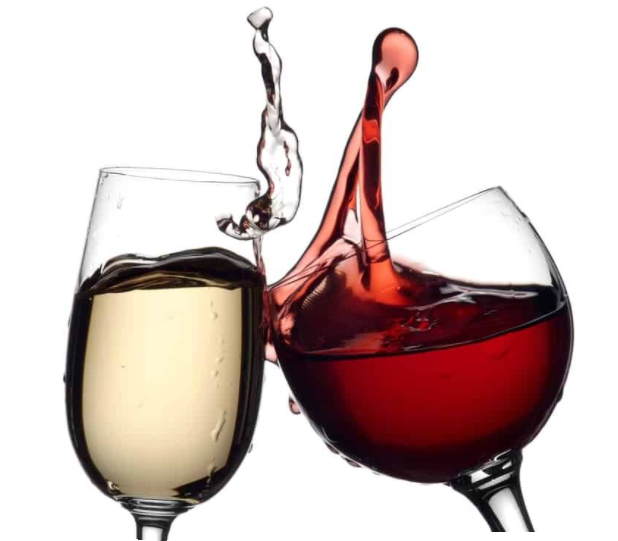

## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacionadas;
* Encontrar as principais diferenças entre os clusters;
* Identificar quais é o vinho mais alcoolico;
* Encontrar modelos de clusterings com métricas adequadas.

## Informações sobre o dataset e limitações

O dataset não informa de forma explicita o que indicam as features.


**FONTE E REFERÊNCIAS:**
* adasd
* https://www.kaggle.com/suprarai/wine-classification-a-machine-learning-pipeline

**LIMITAÇÕES DA ANÁLISE:**
* A falta de conhecimento específico sobre os atributos;

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

## Importações iniciais

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import plotly.graph_objects as go
import plotly.express as px
from biokit.viz import corrplot

# configurações
import warnings
warnings.filterwarnings('ignore')

# Tratamento dos dados
---

In [9]:
wines = pd.read_csv('../dados/winequalityN.csv')
wines.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Quantidade e tipos dos dados

In [10]:
wines.shape

(6497, 13)

In [11]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Verificação de valores nulos

In [12]:
wines.isnull().sum().sum()

38

## Verificação de duplicatas

In [13]:
wines.duplicated().sum()

1168

In [14]:
duplicated_wines = wines[wines.duplicated()]
duplicated_wines.type.value_counts()

white    928
red      240
Name: type, dtype: int64

In [15]:
wines.groupby('type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
white,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909


## Renomenado o dataset

In [16]:
wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [17]:
# dic's columns
colunas = {
    'type':'tipo',
    'fixed acidity':'acido_fixado',
    'volatile acidity':'acido_volatil',
    'citric acid':'acido_citrico',
    'residual sugar':'acucar_residual',
    'chlorides':'cloretos',
    'free sulfur dioxide':'dioxido_S_livre',
    'total sulfur dioxide':'dioxido_S_total',
    'density':'densidade',
    'pH':'ph',
    'sulphates':'sulfatos',
    'alcohol':'alcool',
    'quality':'qualidade'
}

# type's names
tipo = {'white':'branco', 'red':'vermelho'}

# renomeado as colunas
wines.rename(columns=colunas, inplace=True)

# renomeando a coluna do tipo
wines.tipo = wines.tipo.map(tipo)

## Removendo dados nulos e duplicatas

In [18]:
# removendo dados nulos
wines.dropna(inplace=True)

# removendo duplicatas
filtro = (wines.duplicated())
wines = wines[~filtro]

In [19]:
wines.shape

(5295, 13)

In [20]:
wines.to_csv('../dados/wines_tratado.csv', index=False)

# Análise do dataset
---

## Análises estatísticas

### Correlação

In [21]:
wines.corr()

,acido_fixado,acido_volatil,acido_citrico,acucar_residual,cloretos,dioxido_S_livre,dioxido_S_total,densidade,ph,sulfatos,alcool,qualidade
acido_fixado,1.000000,0.216524,0.329252,-0.106084,0.289903,-0.282025,-0.328631,0.478920,-0.269624,0.307044,-0.103657,-0.079599
acido_volatil,0.216524,1.000000,-0.382750,-0.164438,0.368266,-0.349784,-0.401231,0.308416,0.245329,0.226537,-0.066781,-0.265214
acido_citrico,0.329252,-0.382750,1.000000,0.146528,0.055266,0.130802,0.194231,0.095824,-0.342648,0.062121,-0.005124,0.097926
acucar_residual,-0.106084,-0.164438,0.146528,1.000000,-0.123115,0.399579,0.487534,0.520194,-0.233319,-0.174663,-0.305311,-0.054625
cloretos,0.289903,0.368266,0.055266,-0.123115,1.000000,-0.187312,-0.270009,0.372126,0.025963,0.405771,-0.270196,-0.202016
dioxido_S_livre,-0.282025,-0.349784,0.130802,0.399579,-0.187312,1.000000,0.721308,0.005827,-0.141368,-0.199005,-0.169854,0.053786
dioxido_S_total,-0.328631,-0.401231,0.194231,0.487534,-0.270009,0.721308,1.000000,0.005974,-0.222003,-0.275389,-0.247779,-0.050728
densidade,0.478920,0.308416,0.095824,0.520194,0.372126,0.005827,0.005974,1.000000,0.034979,0.283042,-0.668950,-0.325338
ph,-0.269624,0.245329,-0.342648,-0.233319,0.025963,-0.141368,-0.222003,0.034979,1.000000,0.166139,0.096615,0.038903
sulfatos,0.307044,0.226537,0.062121,-0.174663,0.405771,-0.199005,-0.275389,0.283042,0.166139,1.000000,-0.019008,0.041806


Text(0.5, 1.0, 'Correlação entre os atributos')

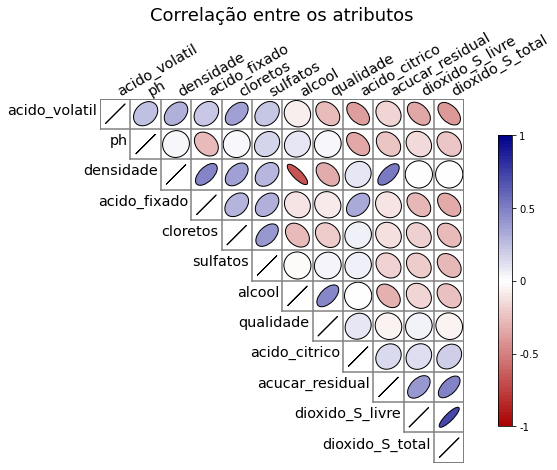

In [22]:
corr_graph = corrplot.Corrplot(wines.corr())
corr_graph.plot(upper='ellipse', fontsize='x-large')
fig = plt.gcf() # "pega a figura atual"
fig.set_size_inches(13, 8)
plt.title("Correlação entre os atributos", fontsize=18)

A coloração azul indica a correlação positiva, isto é, se a variável $x_{1}$ cresce a variável $x_{2}$ também cresce, já a coloração vermelha indica a correlação negativa, ou seja, se a variável $x_{1}$ cresce a variável $x_{2}$ decresce. Além disso, é possível interpretar a área da elipse, se é uma reta indica que a correlação é perfeita ou muito próxima de um, já se tem um formato mais circular, indica a baixa correlação entre as variáveis analisadas.

Além disso, analisando a correlação, podemos remover alguns *features* que têm uma boa correlação, pois essas variáveis estão indicando a mesma situação. Um exemplo de uma possível remoção para uma correlação positiva seria a relação entre os *dioxido_S_livre* e *dioxido_S_total* (**corr:0.72**) ou para uma correlçao negativa a relação entre *densidade* e *alcool* (**corr:0.-66**). Retirando essas colunas muito correlacinados teremos menos um ganho na velocidade computacional e na utilização de algoritmos de aprendizado de máquina. Entranto, devido ao tamanho do dataset, não iremos remover nenhuma coluna.

### Análise das médias

In [23]:
from scipy.stats import trim_mean
dic_mean = dict()
for i in wines.columns:
    try:
        dic_mean[i] = [wines[i].mean(), trim_mean(wines[i], 0.1) ]
    except:
        pass

pd.DataFrame(dic_mean, index=['mean', 'trimm_mean'])

,acido_fixado,acido_volatil,acido_citrico,acucar_residual,cloretos,dioxido_S_livre,dioxido_S_total,densidade,ph,sulfatos,alcool,qualidade
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
trimm_mean,7.056632,0.320204,0.317982,4.296578,0.051068,28.755015,113.914326,0.994522,3.218980,0.518112,10.465904,5.770120


Pela análise das média normal e aparada é possível perceber que o `acucar_residual` apresenta uma variação grande. Por isso, possívelmente esse dado contém outliers.

### Análise descritiva

In [24]:
wines.describe()

,acido_fixado,acido_volatil,acido_citrico,acucar_residual,cloretos,dioxido_S_livre,dioxido_S_total,densidade,ph,sulfatos,alcool,qualidade
count,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,5.796034
std,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.880005
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996780,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**VERIFICANDO A PROPORÇÃO DOS DADOS**

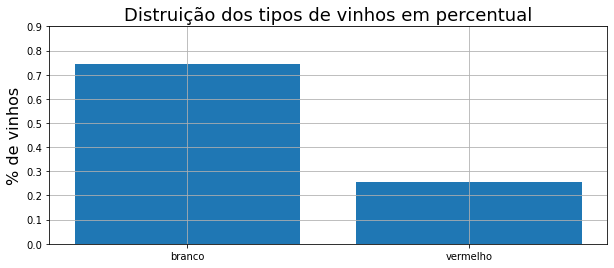

In [38]:
plt.figure(figsize=(10, 4))
plt.grid()
plt.bar(x = ['branco', 'vermelho'], height=wines.tipo.value_counts(normalize=True))
plt.title('Distruição dos tipos de vinhos em percentual', fontsize=18)
plt.yticks([x/10 for x in range(0,10)])
plt.ylabel('% de vinhos', fontsize=16)
plt.show()

Pode-se verificar uma discrepância entre as a quantidade de dados de vinhos brancos e dados de vinho vermelho. Por isso, tal fato foi levado em consideração na hora da criação do modelo de classificação.

### Análise univariada

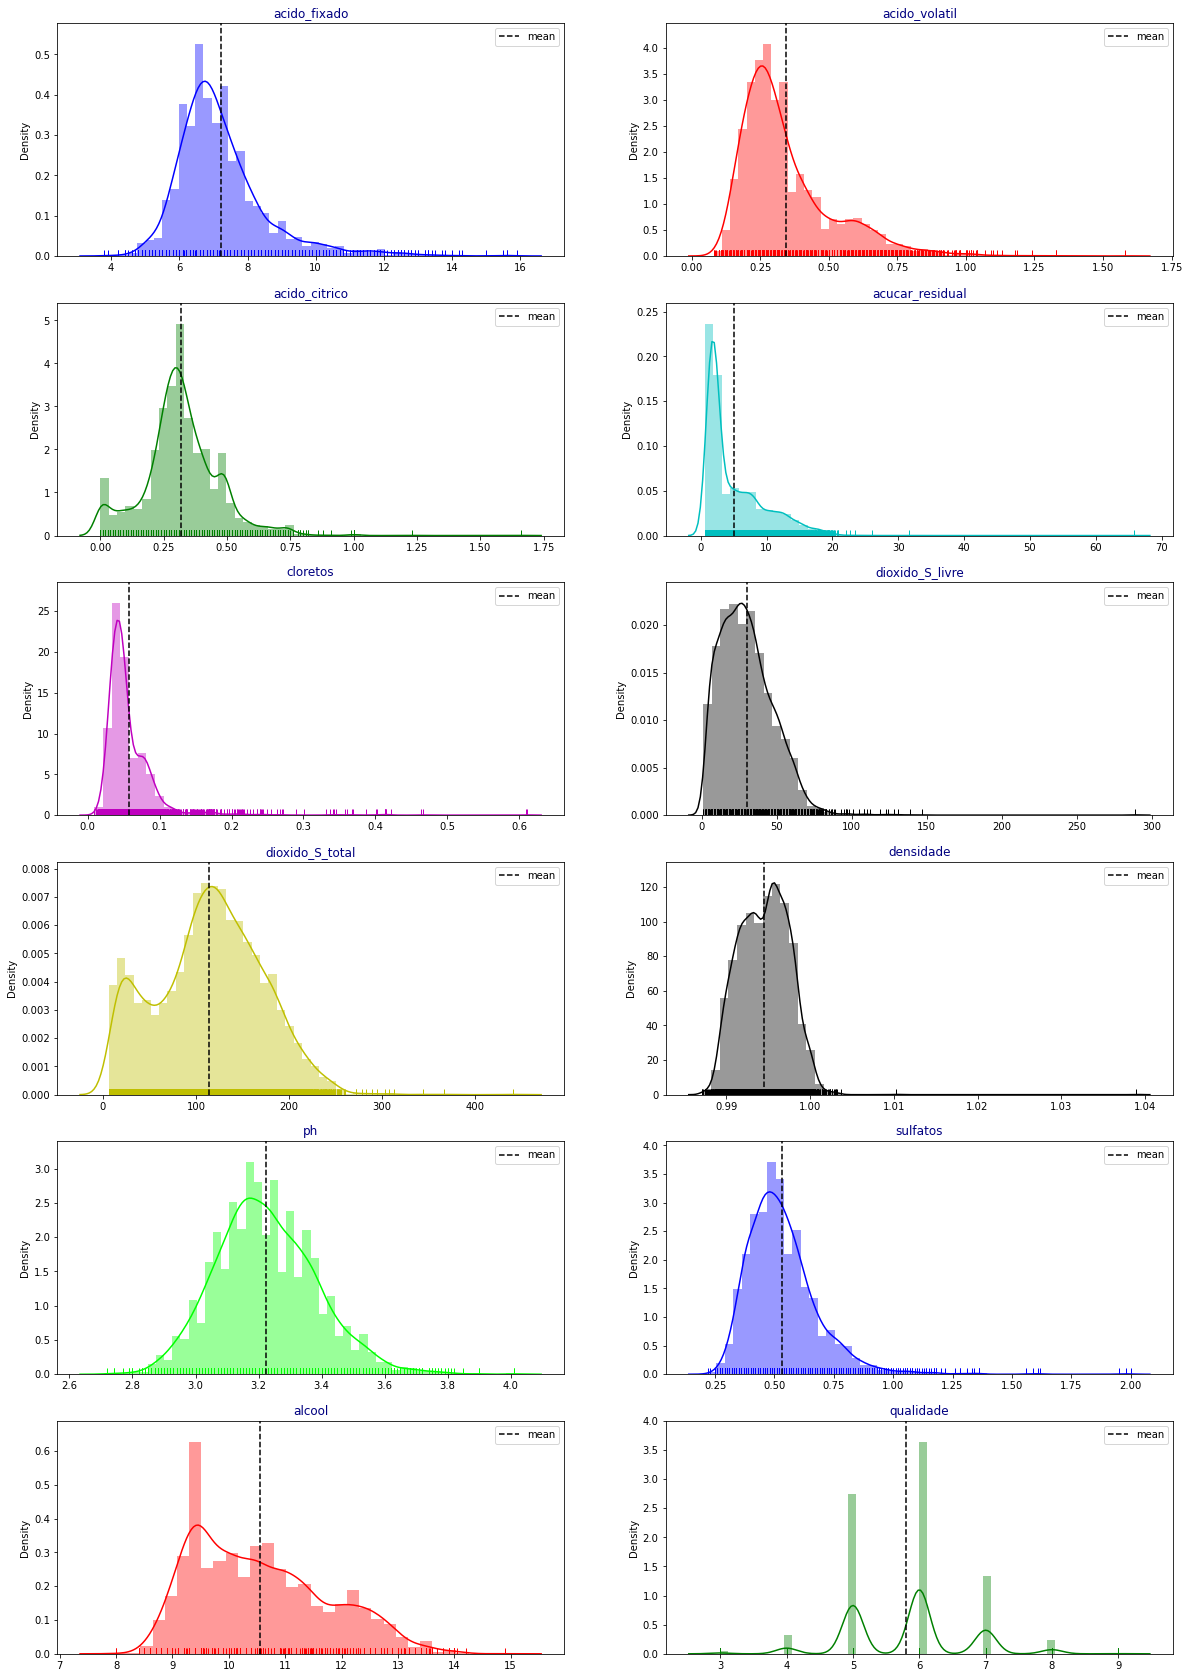

In [21]:
cols = [i for i in wines.columns if i not in 'tipo']
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", 'y', 'k', 'lime', 'b', 'r', 'g']
fig = plt.figure(figsize=(20, 30))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(6, 2, j+1)
    ax = sns.distplot(wines[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(wines[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

### Verificação de outliers

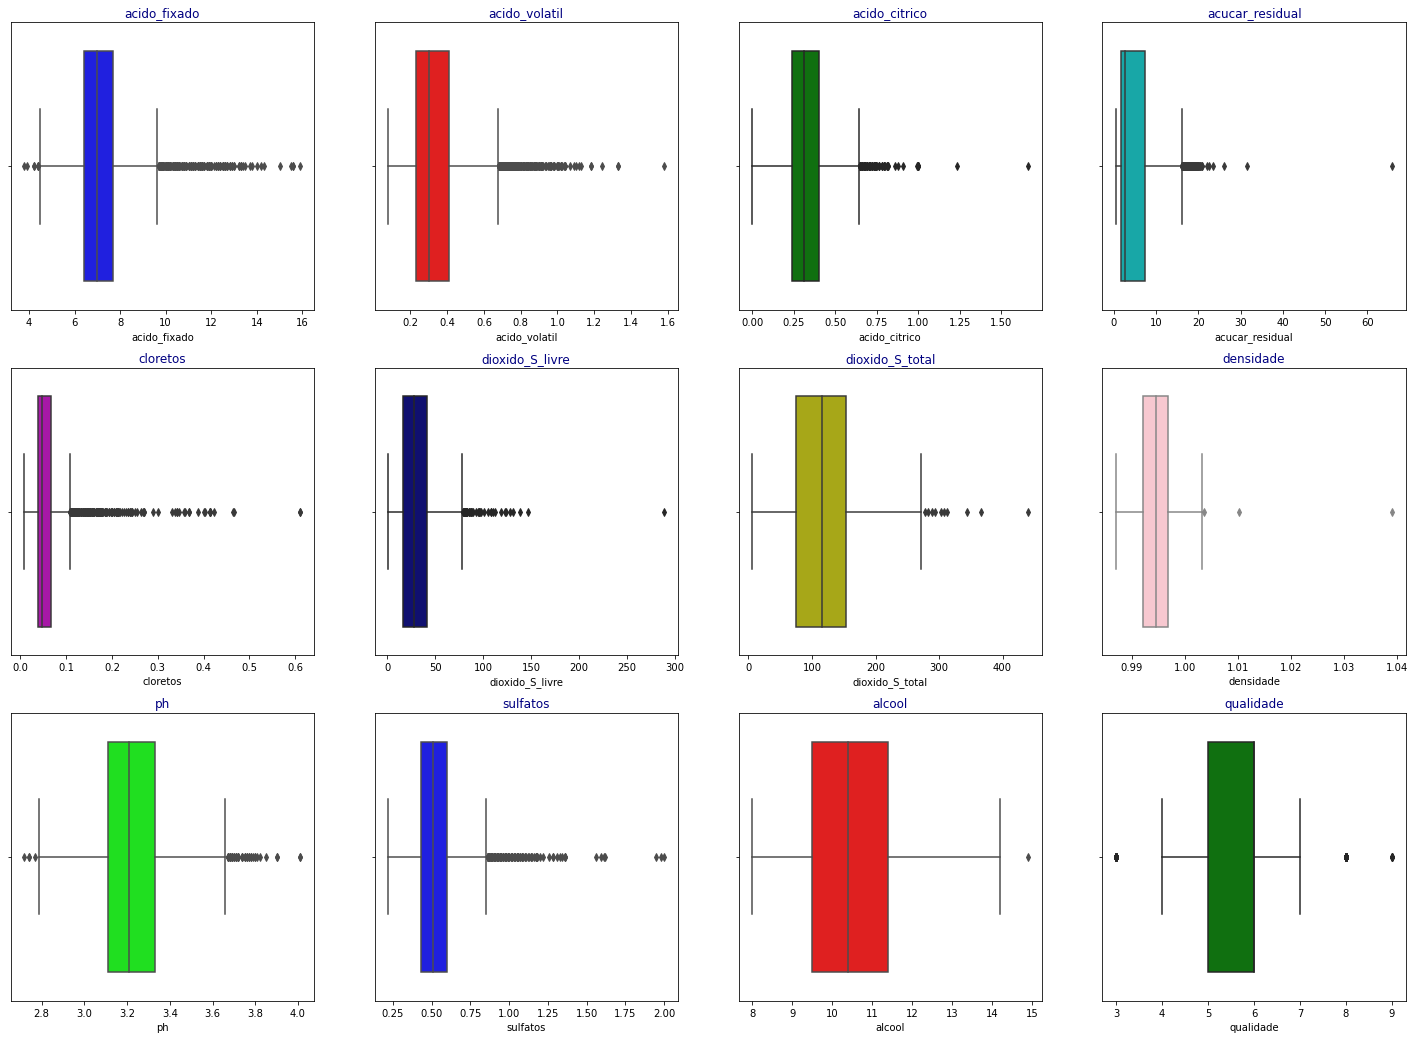

In [20]:
columns = [i for i in wines.columns if i not in 'tipo']
cs = ["b", "r", "g", "c", "m", "navy", 'y', 'pink', 'lime', 'b', 'r', 'g', 'c']
i=1

plt.figure(figsize=(25, 18))
for _, each in enumerate(columns):
    df = wines[each]
    plt.subplot(3, 4, i)
    sns.boxplot(df, color=cs[_])
    plt.title(each, color="navy")
    i += 1

# Modelagem 
---

## Ajuste no dataset

In [22]:
# criando o dataset para classificação
classificacao = wines.copy()

## Separação das variáveis

In [23]:
# separanda as variáveis
X, y = classificacao.drop(columns='tipo', axis=1).values, classificacao.tipo.values

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

# instanciando nosso modelo
validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

# separando em treino e teste
for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]


## PIPELINE


In [25]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  

**PIPELINES - SEM PCA**

In [29]:
# Logistic Regression
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                       ('lr_classifier', LogisticRegression(random_state=0))])

# Pipeline for decision tree
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(max_depth=3))])

# Pipeline for random forest classification
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

**PIPELINES - COM PCA**

In [30]:
# Pipeline for logistic regression
pipeline_pca_lr = Pipeline([('scalar1', StandardScaler()),
                       ('pca1', PCA(n_components=2)),
                       ('lr_classifier', LogisticRegression(random_state=0))])

# Pipeline for decision tree
pipeline_pca_dt = Pipeline([('scalar2', StandardScaler()),
                       ('pca2', PCA(n_components=2)),
                       ('dt_classifier', DecisionTreeClassifier(max_depth=3))])

# Pipeline for random forest classification
pipeline_pca_rf = Pipeline([('scalar3', StandardScaler()),
                       ('pca3', PCA(n_components=2)),
                       ('rf_classifier', RandomForestClassifier())])

**CRIAÇÃO DAS PIPELINES**

In [31]:
# pipeline's classifier list
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_pca_lr, pipeline_pca_dt, pipeline_pca_rf]

**TREINANDO A PIPELINE**

In [32]:
%%time
for pipe in pipelines:
    pipe.fit(X_train, y_train)

Wall time: 1.38 s


In [33]:
pipe_dict = {0: 'Logistic Regression only',
             1: 'Decision Tree Classifier only',
             2: 'Random Forest Classifier only',
             3: 'First PCA and Logistic Regression',
             4: 'First PCA and Decision Tree Classifier',
             5: 'First PCA and Random Forest Classifier'
            }

In [34]:
# Model evaluation in training dataset
scores = []

for i, model in enumerate(pipelines):
    scores.append(model.score(X_train, y_train))
    print("{} Training Accuracy: {}".format(pipe_dict[i], model.score(X_train, y_train).round(4))) 

Logistic Regression only Training Accuracy: 0.9931
Decision Tree Classifier only Training Accuracy: 0.974
Random Forest Classifier only Training Accuracy: 0.9996
First PCA and Logistic Regression Training Accuracy: 0.9811
First PCA and Decision Tree Classifier Training Accuracy: 0.9824
First PCA and Random Forest Classifier Training Accuracy: 0.9996


In [35]:
frame = pd.Series(scores, pipe_dict.items())

In [36]:
frame.to_frame()

,,0
0,Logistic Regression only,0.993075
1,Decision Tree Classifier only,0.973977
2,Random Forest Classifier only,0.999580
3,First PCA and Logistic Regression,0.981112
4,First PCA and Decision Tree Classifier,0.982371
5,First PCA and Random Forest Classifier,0.999580
